In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from finch import FINCH

In [3]:
data = pd.read_csv('temp_datalab_records_linkedin_company.csv',engine='c', low_memory=False)

In [45]:
def window_frame(df,chunk_size):
    
    def index_marks(): return range(1 * chunk_size, (len(df) // chunk_size + 1) * chunk_size, chunk_size)
        
    indices = index_marks()
    window_stamps = []
    frames = np.split(df,indices)
    dico = {}
    for i in range(len(indices)):
        dico['$W^'+str(chunk_size)+'_'+str(i+1)+'$'] = frames[i]
        window_stamps.append('$W^'+str(chunk_size)+'_'+str(i+1)+'$')
    
    return window_stamps, dico

def added_vals(list_values):
    current = []
    for i in range(len(list_values)):
        if i == 0: current.append(0)
        else: current.append(list_values[i]-list_values[i-1])
    return current

def company_information(df,company):
    '''
        get the number of followers per day for a given company.
    '''
    
    df2 = df[df.company_name == company]
    df2['added_followers_count'] = added_vals(df2.followers_count.values)
    df2['added_employees_on_platform'] = added_vals(df2.employees_on_platform.values)
    return df2.loc[:, ['as_of_date','company_name','followers_count',
                       'added_followers_count','employees_on_platform','added_employees_on_platform']]

def get_all_company_followers(df,companies):
    list_frames = []
    for c in companies:
        info = company_information(df,c)
        info[c] = info.added_followers_count
        info.set_index('as_of_date',inplace=True)
        list_frames.append(info.loc[:,[c]])
    whole_frame = pd.concat(list_frames, axis=1)
    whole_fram.fillna()
    return 

def plot_company_followers(df,company):
    
    company_info = company_information(df,company).loc[:, ['as_of_date','added_followers_count']]
    company_info.set_index('as_of_date',inplace=True)
    fig = plt.figure(figsize=(12,4),dpi=125)
    axe = fig.add_subplot(111)
    company_info.plot(ax=axe, lw=1.5,alpha=1)
    plt.show()
    
def plot_company_employees(df,company):
    
    company_info = company_information(df,company).loc[:, ['as_of_date','added_employees_on_platform']]
    company_info.set_index('as_of_date',inplace=True)
    fig = plt.figure(figsize=(12,4),dpi=125)
    axe = fig.add_subplot(111)
    company_info.plot(ax=axe, lw=1.5,alpha=1)
    plt.show()

In [8]:
companies = list(data.company_name.unique())

In [33]:
dates = data.as_of_date.unique()

In [34]:
dates

array(['2015-09-14', '2015-09-15', '2015-09-16', ..., '2018-07-15',
       '2018-07-16', '2018-07-17'], dtype=object)

In [21]:
company_information(data,'Goldman Sachs')

C:\Users\etaje\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\etaje\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,as_of_date,company_name,followers_count,added_followers_count,employees_on_platform,added_employees_on_platform
0,2015-09-14,Goldman Sachs,552254,0,38124,0
1,2015-09-15,Goldman Sachs,552862,608,38141,17
65,2015-09-16,Goldman Sachs,553592,730,38145,4
280,2015-09-17,Goldman Sachs,554209,617,38143,-2
613,2015-09-18,Goldman Sachs,554988,779,38130,-13
...,...,...,...,...,...,...
2409947,2018-07-13,Goldman Sachs,1025379,1256,53484,35
2411655,2018-07-14,Goldman Sachs,1025620,241,53492,8
2417820,2018-07-15,Goldman Sachs,1028132,2512,53513,21
2419209,2018-07-16,Goldman Sachs,1029599,1467,53534,21


In [35]:
len(companies)

5028

C:\Users\etaje\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\etaje\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


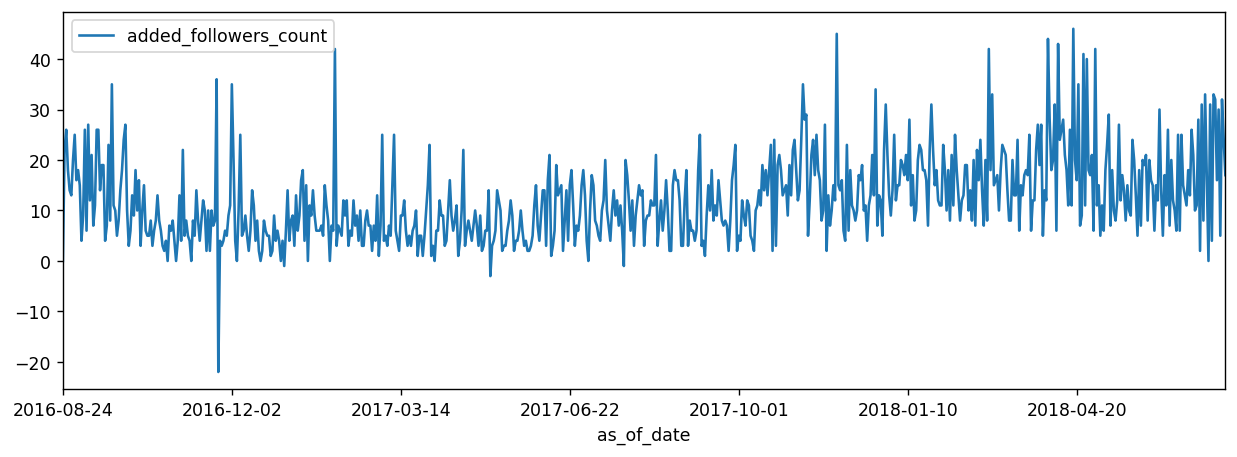

In [37]:
plot_company_followers(data, companies[1000])

C:\Users\etaje\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\etaje\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


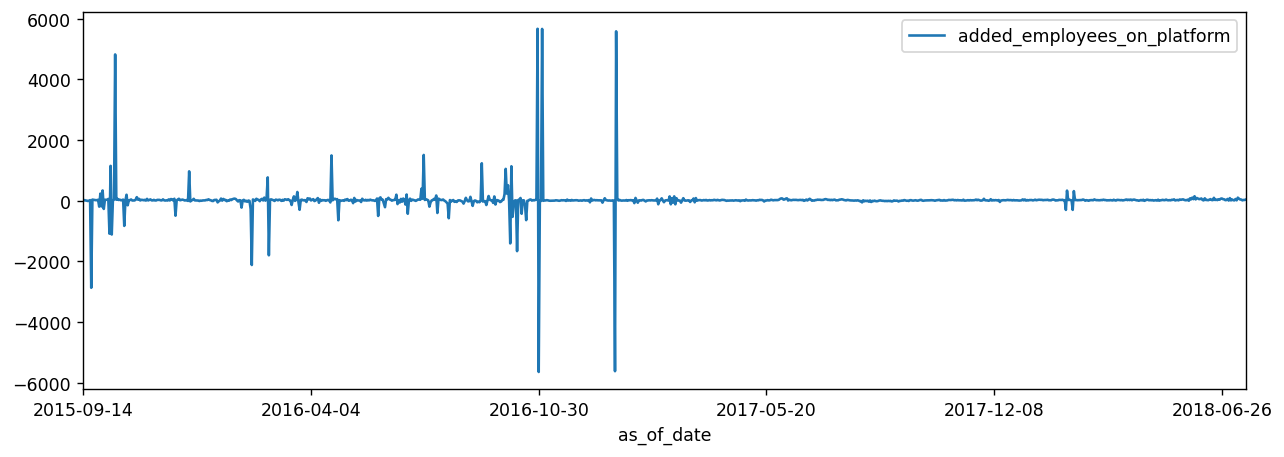

In [32]:
plot_company_employees(data, 'Goldman Sachs')

C:\Users\etaje\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\etaje\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\etaje\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and

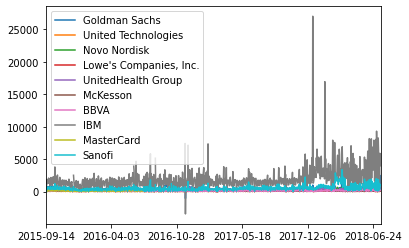

In [46]:
get_all_company_followers(data,companies[0:10]).plot()
plt.show()